## Task #4
Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv("/content/twitter_training.csv")
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [ ]:
# Change columns name
df.rename(columns={'Positive':'Categorey','im getting on borderlands and i will murder you all ,':'text'},inplace=True)

In [ ]:
df.shape

(74681, 4)

## Data Cleaning

In [ ]:
# Checking null values
df.isnull().sum()

2401             0
Borderlands      0
Categorey        0
text           686
dtype: int64

In [ ]:
# Drop duplicates in data
df.drop_duplicates(inplace=True)

In [ ]:
# Checking the duplicates
df.duplicated().sum()

0

In [ ]:
df.head()

,2401,Borderlands,Categorey,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


## Data Preprocessing

In [ ]:
from bs4 import BeautifulSoup
import re
import string
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize


nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
df.text

0        I am coming to the borders and I will kill you...
1        im getting on borderlands and i will kill you ...
2        im coming on borderlands and i will murder you...
3        im getting on borderlands 2 and i will murder ...
4        im getting into borderlands and i can murder y...
                               ...                        
74676    Just realized that the Windows partition of my...
74677    Just realized that my Mac window partition is ...
74678    Just realized the windows partition of my Mac ...
74679    Just realized between the windows partition of...
74680    Just like the windows partition of my Mac is l...
Name: text, Length: 71981, dtype: object

In [ ]:
def clean_text(text):
    if isinstance(text, str):
        # Remove HTML tags
        text = BeautifulSoup(text, 'html.parser').get_text()

        # Remove special characters and digits
        text = re.sub(r"[^a-zA-Z]", " ", text)

        # Remove punctuation
        text = text.translate(str.maketrans("", "", string.punctuation))

        # Remove emojis
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                                   u"\U00002702-\U000027B0"
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        # Convert to lowercase
        text = text.lower()

        # Remove stop words
        stop_words = set(stopwords.words('english'))
        tokens = word_tokenize(text)
        tokens = [word for word in tokens if word not in stop_words]
        text = ' '.join(tokens)

        return text
    else:
        # If the text is not a string (NaN or other), return an empty string
        return ""

In [ ]:
df["text"]=df["text"].apply(clean_text)

<ipython-input-84-d08123229a02>:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, 'html.parser').get_text()


## Data Visualization

<ipython-input-86-08d3aeb8d1bd>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Categorey', data=df, palette='muted')


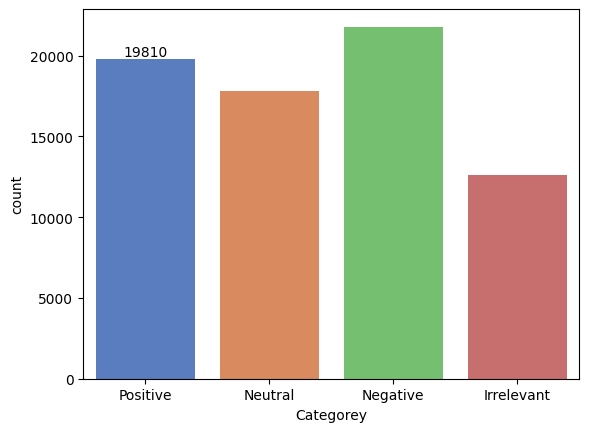

In [ ]:
ax = sns.countplot(x='Categorey', data=df, palette='muted')
ax.bar_label(ax.containers[0], label_type='edge')
plt.show()

In [ ]:
df["text"]=df["text"].astype(str)
from wordcloud import WordCloud,STOPWORDS

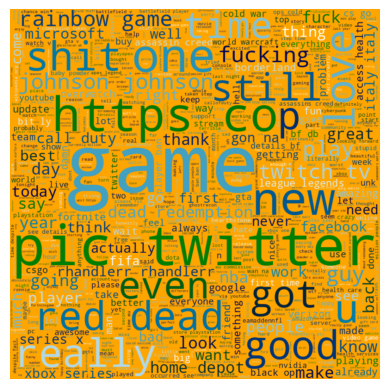

In [ ]:
all_text=" ".join(df['text'].values.tolist())
wordcloud = WordCloud(width=800, height=800,stopwords=STOPWORDS, background_color='orange', max_words=800,colormap="ocean").generate(all_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

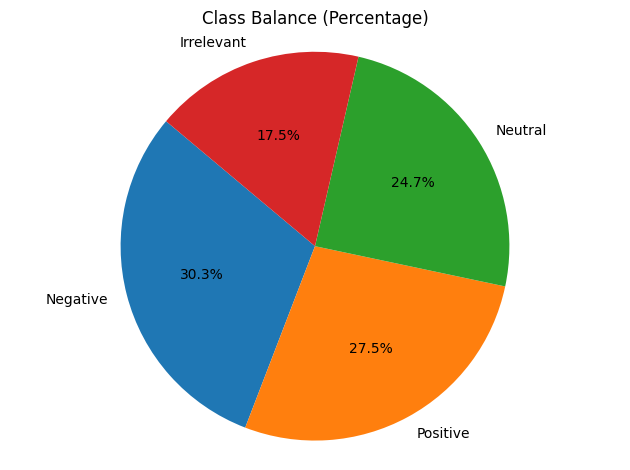

In [ ]:
# Calculate class counts
class_counts = df['Categorey'].value_counts().reset_index()
class_counts.columns = ['Class', 'Count']

# Calculate the total number of images in train_df
total_images = len(df)

# Calculate the percentage for each class based on the total number of images
class_counts['Percentage'] = (class_counts['Count'] / total_images) * 100

# Sort the dataframe by count
class_counts = class_counts.sort_values(by='Count', ascending=False)

# Create the pie chart using matplotlib|
plt.pie(class_counts['Percentage'], labels=class_counts['Class'], autopct='%1.1f%%', startangle=140)
plt.title('Class Balance (Percentage)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

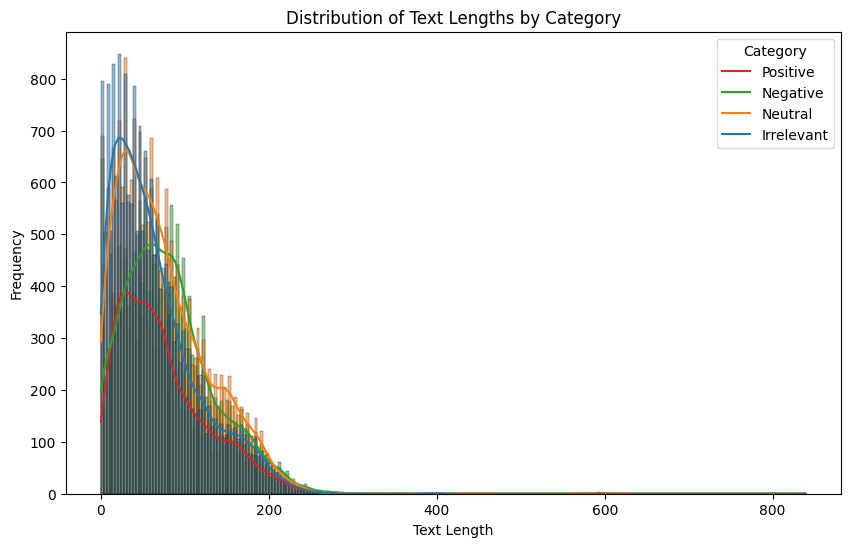

In [ ]:
p_len=df[df["Categorey"]=="Positive"]["text"].str.len()
n_len=df[df["Categorey"]=="Negative"]["text"].str.len()
neu_len=df[df["Categorey"]=="Neutral"]["text"].str.len()
irr_len=df[df["Categorey"]=="Irrelevant"]["text"].str.len()
lengths_df = pd.DataFrame({
    "Positive": p_len,
    "Negative": n_len,
    "Neutral": neu_len,
    "Irrelevant": irr_len
})

plt.figure(figsize=(10, 6))
sns.histplot(data=lengths_df, kde=True)
plt.title('Distribution of Text Lengths by Category')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.legend(title='Category', labels=['Positive', 'Negative', 'Neutral', 'Irrelevant'])
plt.show()